# Police Stops in Massachusetts
Visualizing racial disparities in police stops by Massachusetts State Police

In [26]:
# Load Data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("ma_statewide_2020_04_01.csv")
print(df.shape)
df.head()

(3416238, 24)


,raw_row_number,date,location,county_name,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_stop,vehicle_type,vehicle_registration_state,raw_Race
0,1,2007-06-06,MIDDLEBOROUGH,Plymouth County,33.0,white,male,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,Speed,Passenger,MA,White
1,2,2007-06-07,SEEKONK,Bristol County,36.0,white,male,vehicular,False,False,...,False,False,False,False,True,other,NaN,Commercial,MA,White
2,3,2007-06-07,MEDFORD,Middlesex County,56.0,white,female,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Passenger,MA,White
3,4,2007-06-07,MEDFORD,Middlesex County,37.0,white,male,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,White
4,5,2007-06-07,EVERETT,Middlesex County,22.0,hispanic,female,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,Hispanic


In [22]:
# Filter rows that don't have race data 
df = df[df["subject_race"].notnull()]
print(df.shape)
df.head()

(3414574, 24)


,raw_row_number,date,location,county_name,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_stop,vehicle_type,vehicle_registration_state,raw_Race
0,1,2007-06-06,MIDDLEBOROUGH,Plymouth County,33.0,white,male,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,Speed,Passenger,MA,White
1,2,2007-06-07,SEEKONK,Bristol County,36.0,white,male,vehicular,False,False,...,False,False,False,False,True,other,NaN,Commercial,MA,White
2,3,2007-06-07,MEDFORD,Middlesex County,56.0,white,female,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Passenger,MA,White
3,4,2007-06-07,MEDFORD,Middlesex County,37.0,white,male,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,White
4,5,2007-06-07,EVERETT,Middlesex County,22.0,hispanic,female,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,Hispanic


We only removed 1,664 records. 

In [53]:
# Racial breakdown of traffic stops
racial_breakdown = df.groupby('subject_race')['raw_row_number'].nunique()

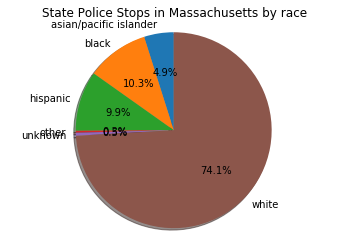

In [59]:
labels = []
sizes = []

for race, stops in racial_breakdown.items():
    labels.append(race)
    sizes.append(stops)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("State Police Stops in Massachusetts by race")
plt.show()

Massachusetts in 2018 was about 12.3% Hispanic, 80% White (71.4% non-Hispanic White), 8.9% Black, 7.2% AAPI, and 3% other. (These don't add up to 100% because Hispanic is not considered a race by the Census). Overall, police stops in Massachusetts are roughly inline with proportions of Census categories, though there could be discrepancies due to how police perceive the people they stop.

In [63]:
# TODO: look at search_conducted, frisk_performed, search_basis, 
# contraband_(found, drugs, weapons, alcohol, other), search_basis, arrest_made, citation_issued, warning_issued, 

# Map by county and location

# subject_age, subject_sex 

0            NaN
1          other
2            NaN
3            NaN
4            NaN
           ...  
3416233      NaN
3416234      NaN
3416235      NaN
3416236      NaN
3416237      NaN
Name: search_basis, Length: 3414574, dtype: object